# Plotting Turn-by-Turn Data for Synergia Simulations of IOTA with Space Charge

Simulating IOTA with self-consistent space charge included in Synergia.
Key Parameters:

- Number of Macroparticles = 102400
- Distribution: Waterbag
- Hmax = 8 mm-mrad
- t = 0.4
- c = 0.01
- dQ = 0.03
- xoffset = 0 $\mu$m
- yoffset = 0 $\mu$m

For a more complete list see attributes of .h5 file.

Contents of .h5 file listed below.


In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import h5py as h5
from matplotlib.ticker import ScalarFormatter

# Load Data

In [10]:
h5data = h5.File('240nll_sc_waterbag_t0p4_c0p01_emit8um_statistics.h5', 'r')

### Datasets in File

In [12]:
for key in h5data.keys():
    print "{} - {}".format(key, h5data[key].attrs['description'])

Cx - Average of particle x-coordinates at start of each turn
Cy - Average of particle y-coordinates at start of each turn
Havg - Average of H at the start of each turn
Hstd - Standard deviation of H normalized by the average of H at the start of each turn
Iavg - Average of sqrt(I) at the start of each turn
Istd - Standard deviation of sqrt(I) normalized by the average of sqrt(I) at the start of each turn
Sx - Standard deviation of particle x-coordinates at start of each turn
Sy - Standard deviation of particle y-coordinates at start of each turn
final_distribution - Waterbag distribution after final turn
initial_distribution - Waterbag distribution at start of simulation


## Simulation Parameters Included in File

In [41]:

for attr in h5data.attrs:
    print "{} - {}".format(attr, h5data.attrs[attr])

beta_0 - 0.639101883936
c - 0.01
g_emit - 8e-06
map_order - 1
vkick - 0.0
I - 0.000411293017113
yoffset - 0.0
use_maps - all
tier_one_lattice - /home/vagrant/jupyter/github/ioptics/ioptics/lattices/Iota8-2/zerodpp_soft_lattice_1IO_dQ_03.madx
bunch_type - waterbag
tier_three_lattice - ../lattices/zerodpp_soft_nll0pt4_240nll_dQ_03.madx
t - 0.4
alpha_0 - 0
hkick - 0.0
sc - True
xoffset - 0.0
sc_solver - 2dopen-hockney


In [43]:
# Sample attribute data
for attr in h5data['Sx'].attrs:
    print "{} - {}".format(attr, h5data['Sx'].attrs[attr])

print

for attr in h5data['initial_distribution'].attrs:
    print "{} - {}".format(attr, h5data['initial_distribution'].attrs[attr])

description - Standard deviation of particle x-coordinates at start of each turn
units - mm

description - Waterbag distribution at start of simulation
format - [x, xp, y, yp, z, dp/p]
units - [m, rad, m, rad, m, 1]


In [13]:
turns = 1000

# SC- Beam Envelopes

<IPython.core.display.Javascript object>


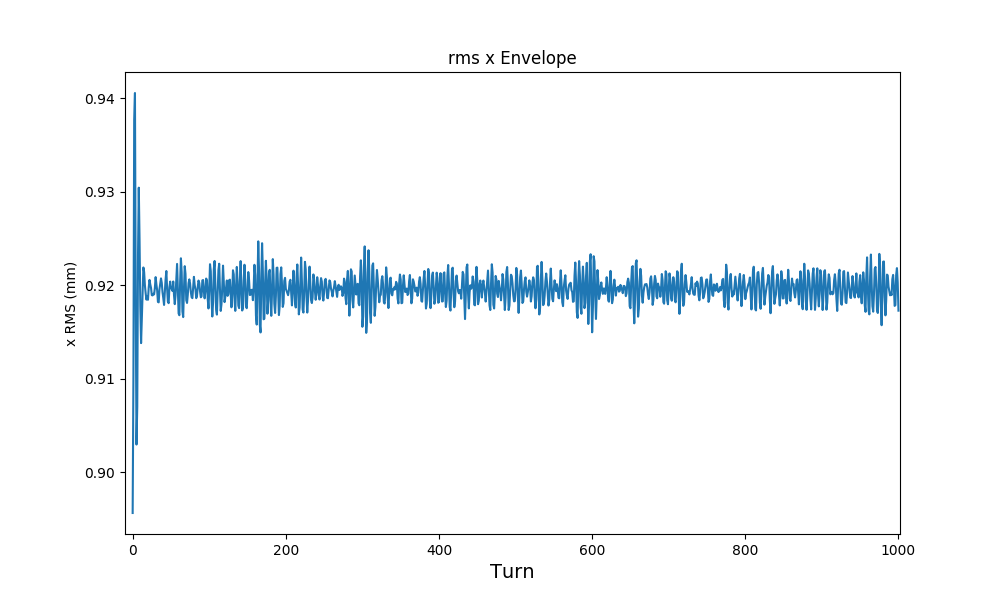

In [16]:
fig1 = plt.figure(figsize=(10,6))
cx = plt.gca()

cx.plot(np.arange(turns+1), h5data['Sx'])

cx.set_xlim(-10,turns+2)
cx.set_xlabel("Turn",fontsize=14)
cx.set_ylabel( "x RMS (mm)")

cx.set_title("rms x Envelope")


plt.show()

<IPython.core.display.Javascript object>


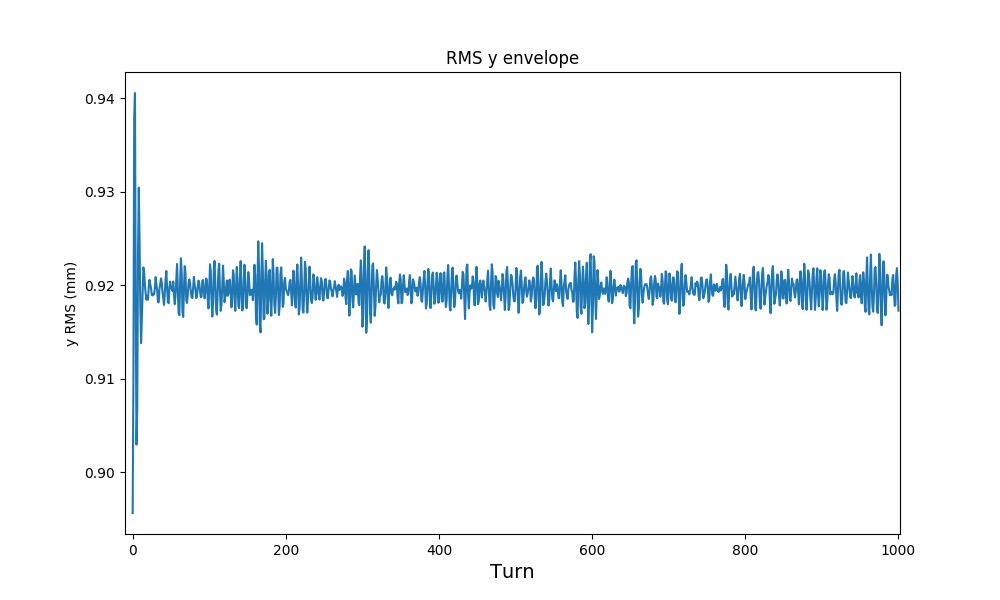

In [18]:
fig2 = plt.figure(figsize=(10,6))
cx = plt.gca()


cx.plot(np.arange(turns + 1), h5data['Sy'])

cx.set_xlim(-10,turns+2)
cx.set_xlabel("Turn",fontsize=14)
cx.set_ylabel( "y RMS (mm)")

cx.set_title("RMS y envelope")


plt.show()

<IPython.core.display.Javascript object>


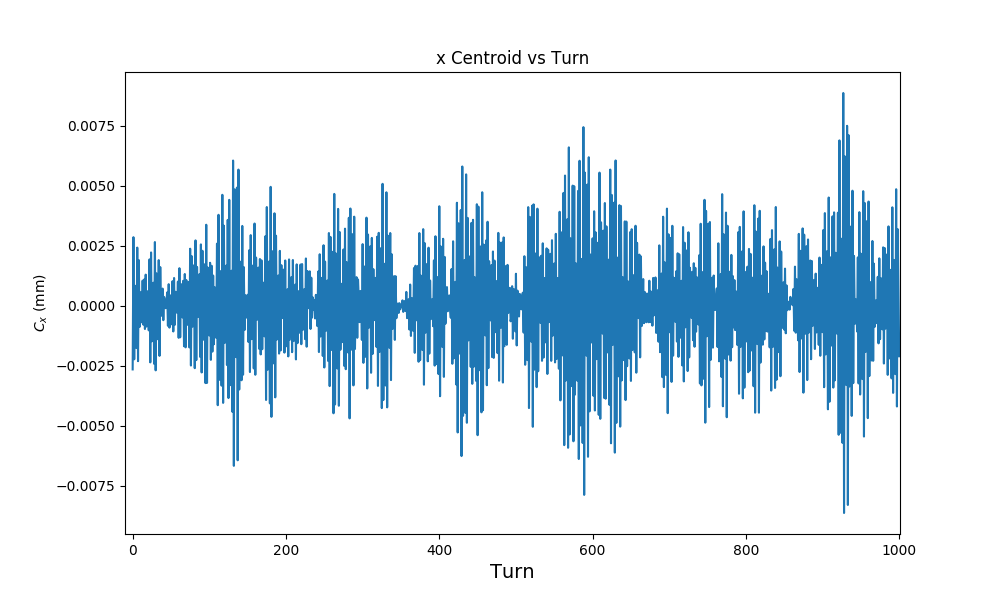

In [21]:
fig3 = plt.figure(figsize=(10,6))
cx = plt.gca()


cx.plot(np.arange(turns + 1), h5data['Cx'])

cx.set_xlim(-10,turns+1)
cx.set_xlabel("Turn",fontsize=14)
cx.set_ylabel( "$C_x$ (mm)")

cx.set_title("x Centroid vs Turn")


plt.show()

<IPython.core.display.Javascript object>


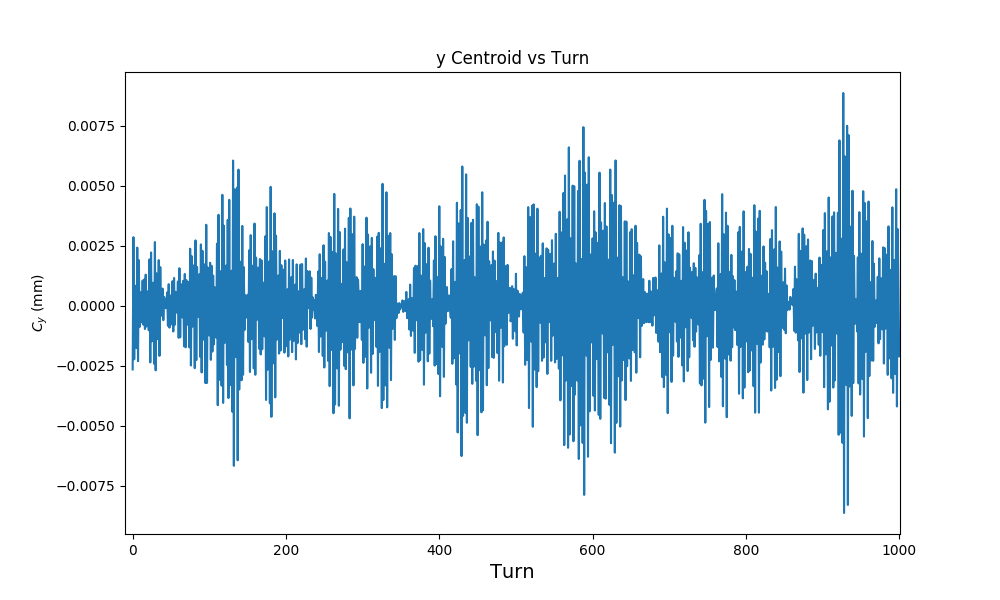

In [22]:
fig4 = plt.figure(figsize=(10,6))
cx = plt.gca()


cx.plot(np.arange(turns + 1), h5data['Cy'])

cx.set_xlim(-10, turns+1)
cx.set_xlabel("Turn",fontsize=14)
cx.set_ylabel( "$C_y$ (mm)")

cx.set_title("y Centroid vs Turn")


plt.show()

# Invariants

## Statistical Quantities

#### First Invariant - H

<IPython.core.display.Javascript object>


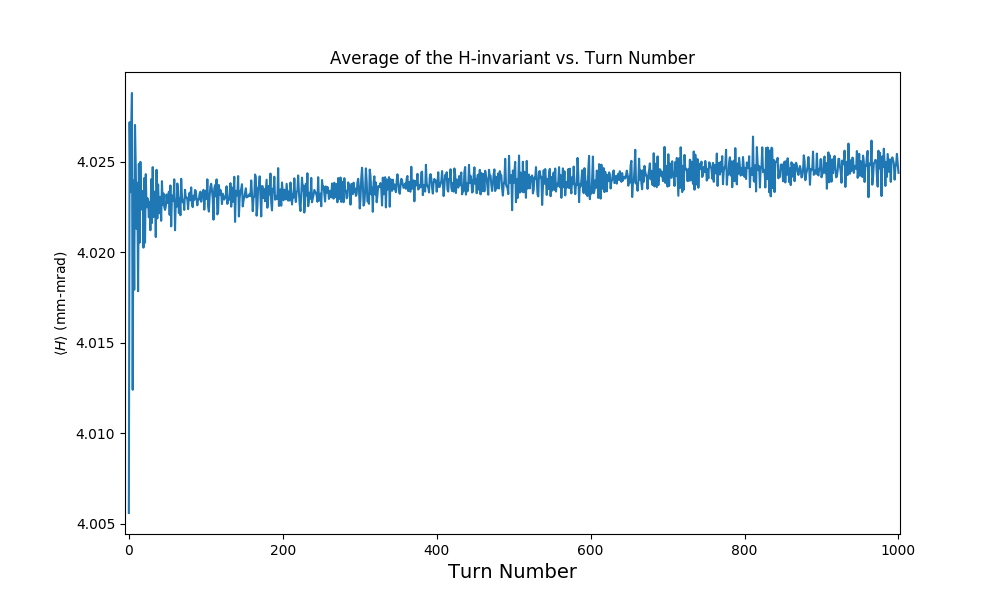

In [28]:
fig5 = plt.figure(figsize=(10,6))
cx = plt.gca()

cx.plot(np.arange(turns + 1), h5data['Havg'])


y_formatter = ScalarFormatter(useOffset=False)
cx.yaxis.set_major_formatter(y_formatter)
    
cx.set_xlim(-5, turns+2)
cx.set_xlabel("Turn Number",fontsize=14)
cx.set_ylabel(r"$\left< H \right>$ (mm-mrad)")
cx.set_title("Average of the H-invariant vs. Turn Number")


plt.show()

<IPython.core.display.Javascript object>


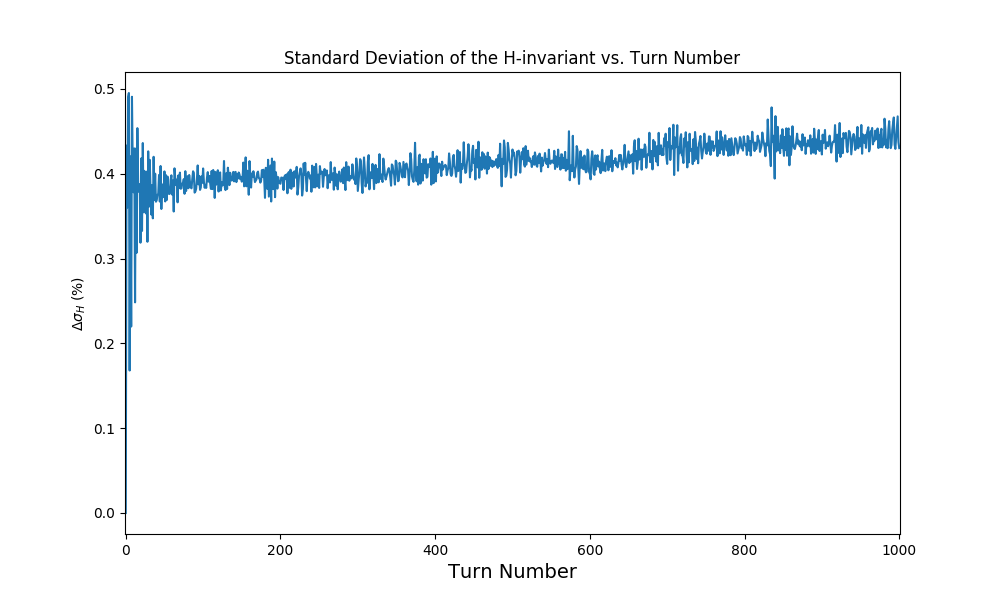

In [30]:
fig6 = plt.figure(figsize=(10,6))
cx = plt.gca()

cx.plot(np.arange(turns + 1), (h5data['Hstd'] - h5data['Hstd'][0])*100,label=key)

cx.set_xlim(-1,turns+1)
cx.set_xlabel("Turn Number",fontsize=14)
cx.set_ylabel("$\Delta\sigma_H$ (%)")
cx.set_title("Standard Deviation of the H-invariant vs. Turn Number")

plt.show()

#### Second Invariant - I

<IPython.core.display.Javascript object>


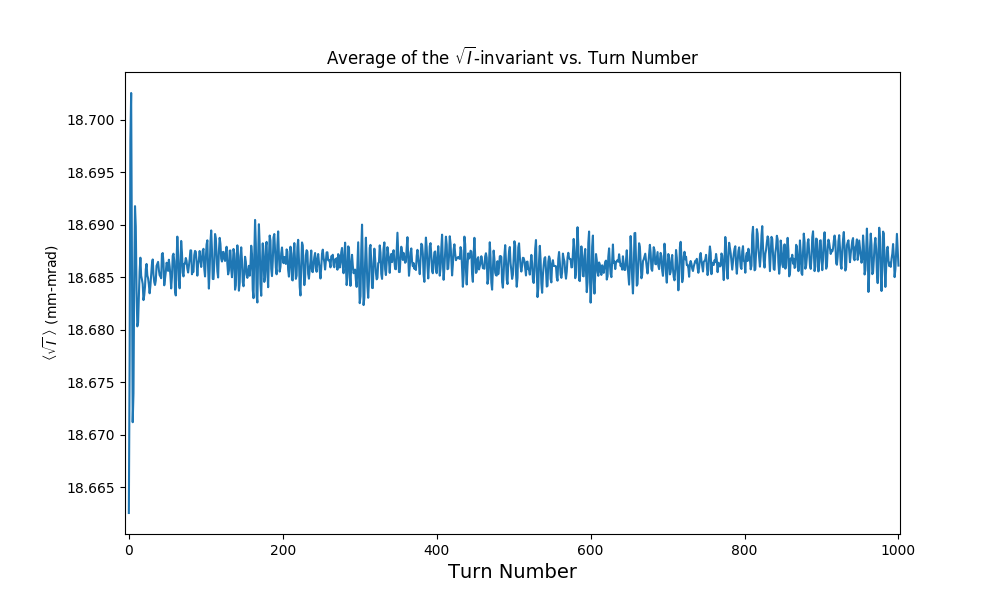

In [36]:
fig7 = plt.figure(figsize=(10,6))
cx = plt.gca()

cx.plot(np.arange(turns + 1), h5data['Iavg'])


y_formatter = ScalarFormatter(useOffset=False)
cx.yaxis.set_major_formatter(y_formatter)
cx.set_xlim(-5,turns+2)
cx.set_xlabel("Turn Number",fontsize=14)
cx.set_ylabel( r"$\left< \sqrt{I} \; \right>$ (mm-mrad)")
cx.set_title(r"Average of the $\sqrt{I}$-invariant vs. Turn Number")


plt.show()

<IPython.core.display.Javascript object>


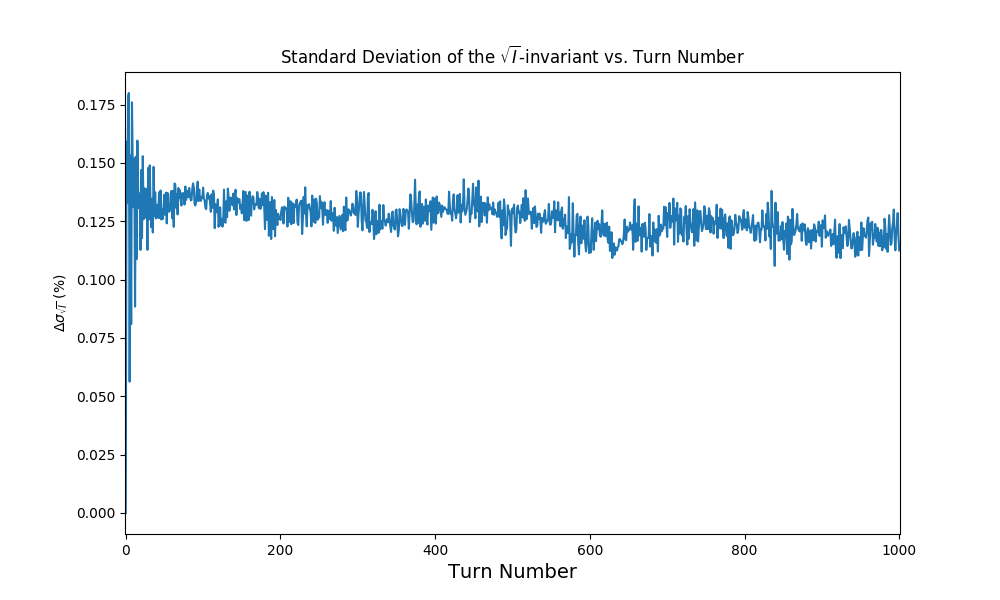

In [38]:
fig8 = plt.figure(figsize=(10,6))
cx = plt.gca()

cx.plot(np.arange(turns + 1), (h5data['Istd'] - h5data['Istd'][0])*100)

cx.set_xlim(-1,turns+1)
cx.set_xlabel("Turn Number",fontsize=14)
cx.set_ylabel("$\Delta\sigma_\sqrt{I}$ (%)")
cx.set_title("Standard Deviation of the $\sqrt{I}$-invariant vs. Turn Number")


plt.show()

# Distribution Plots

<IPython.core.display.Javascript object>


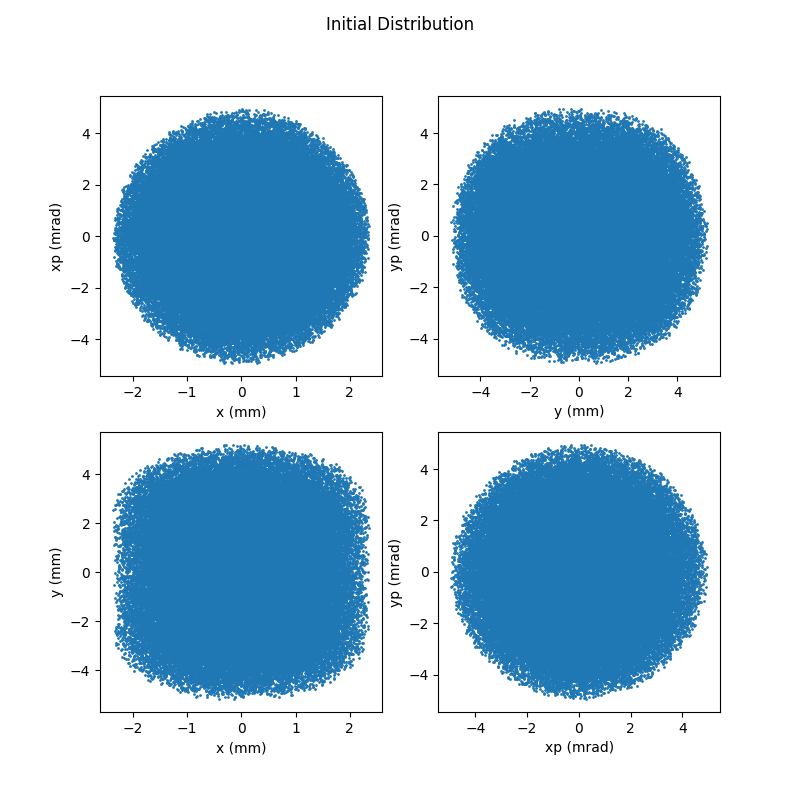

In [52]:
fig9 = plt.figure(figsize=(8, 8))
fig9.suptitle("Initial Distribution")

subplots = []
for i in range(4):
    subplots.append(fig9.add_subplot(2, 2, i + 1))

data = [(0, 1), (2, 3), (0, 2), (1, 3)]
axes = [('x (mm)', 'xp (mrad)'), ('y (mm)', 'yp (mrad)'), 
        ('x (mm)', 'y (mm)'), ('xp (mrad)', 'yp (mrad)')]                    

for i in range(4):
    subplots[i].scatter(h5data['initial_distribution'][:, data[i][0]] * 1e3, 
                        h5data['initial_distribution'][:, data[i][1]] * 1e3, s=1)
    subplots[i].set_xlabel(axes[i][0])
    subplots[i].set_ylabel(axes[i][1])

plt.show()

<IPython.core.display.Javascript object>


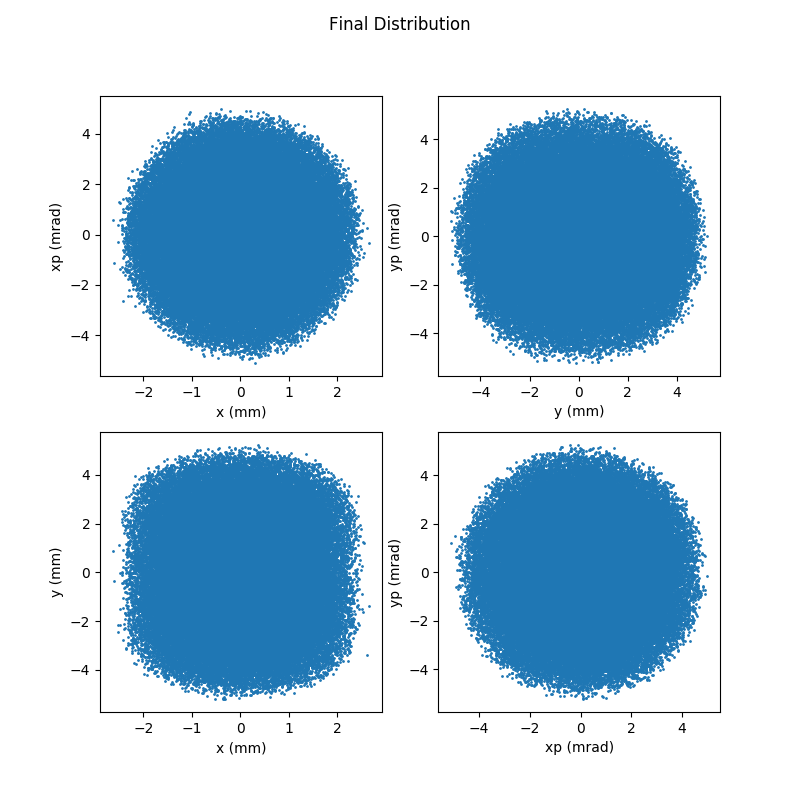

In [51]:
fig9 = plt.figure(figsize=(8, 8))
fig9.suptitle("Final Distribution")

subplots = []
for i in range(4):
    subplots.append(fig9.add_subplot(2, 2, i + 1))

data = [(0, 1), (2, 3), (0, 2), (1, 3)]
axes = [('x (mm)', 'xp (mrad)'), ('y (mm)', 'yp (mrad)'), 
        ('x (mm)', 'y (mm)'), ('xp (mrad)', 'yp (mrad)')]                    

for i in range(4):
    subplots[i].scatter(h5data['final_distribution'][:, data[i][0]] * 1e3, 
                        h5data['final_distribution'][:, data[i][1]] * 1e3, s=1)
    subplots[i].set_xlabel(axes[i][0])
    subplots[i].set_ylabel(axes[i][1])

plt.show()